# Code for Linear Regression

## First, loading and filtering dataset

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("BPIA-APC-LEAD-EARNINGS.csv")

df

,Unnamed: 0,Name,Rank,Race,Gender,Year,CaseID,TypeOfMisconduct,Allegation,Finding,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,0,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,1,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,2,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,3,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,4,joseph abasciano,Police Officer,White,Male,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,1,vladimir xavier,Police Officer,Black,Male,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,2,vladimir xavier,Police Officer,Black,Male,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,0,anthony d ierardi,Sergeant,White,Male,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,0,robert m zingg,Detective,White,Male,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


In [3]:
print(list(df))

['Unnamed: 0', 'Name', 'Rank', 'Race', 'Gender', 'Year', 'CaseID', 'TypeOfMisconduct', 'Allegation', 'Finding', 'Outcome', 'Address', 'Amount', 'CPF ID', 'City', 'Contributor', 'Date', 'Datetime', 'Employer', 'Occupation', 'Principal Officer', 'Recipient', 'Record Type Description', 'Record Type ID', 'Source Description', 'State', 'Tender Type Description', 'Tender Type ID', 'UUID', 'Zip', 'DATE ADDED', 'AGENCY', 'STATUS', 'INFORMATION REGARDING LEAD ENTRY', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN / EDUCATION INCENTIVE', 'TOTAL EARNINGS', 'POSTAL']


In [4]:
df = df.drop(columns=['Unnamed: 0'])

df

,Name,Rank,Race,Gender,Year,CaseID,TypeOfMisconduct,Allegation,Finding,Outcome,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,joseph abasciano,Police Officer,White,Male,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,vladimir xavier,Police Officer,Black,Male,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,Oral Reprimand,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,vladimir xavier,Police Officer,Black,Male,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,NaN,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,anthony d ierardi,Sergeant,White,Male,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,NaN,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,robert m zingg,Detective,White,Male,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,Counselling,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


In [5]:
df.drop_duplicates(subset=['Name', 'TypeOfMisconduct', 'Race', 'Rank', 'Allegation', 'Finding', 'Amount', 'Recipient'], keep='first', inplace=True)

df

,Name,Rank,Race,Gender,Year,CaseID,TypeOfMisconduct,Allegation,Finding,Outcome,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,joseph abasciano,Police Officer,White,Male,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,vladimir xavier,Police Officer,Black,Male,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,Oral Reprimand,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,vladimir xavier,Police Officer,Black,Male,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,NaN,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,anthony d ierardi,Sergeant,White,Male,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,NaN,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,robert m zingg,Detective,White,Male,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,Counselling,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


In [6]:
df = df.dropna(subset = ['TypeOfMisconduct'])

df.to_csv('filtered_final_dataset.csv')

df

,Name,Rank,Race,Gender,Year,CaseID,TypeOfMisconduct,Allegation,Finding,Outcome,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,joseph abasciano,Police Officer,White,Male,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,joseph abasciano,Police Officer,White,Male,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,vladimir xavier,Police Officer,Black,Male,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,Oral Reprimand,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,vladimir xavier,Police Officer,Black,Male,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,NaN,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,anthony d ierardi,Sergeant,White,Male,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,NaN,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,robert m zingg,Detective,White,Male,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,Counselling,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


## Now, customized label encoding to create meaningful features

In [7]:
df.keys()

Index(['Name', 'Rank', 'Race', 'Gender', 'Year', 'CaseID', 'TypeOfMisconduct',
       'Allegation', 'Finding', 'Outcome', 'Address', 'Amount', 'CPF ID',
       'City', 'Contributor', 'Date', 'Datetime', 'Employer', 'Occupation',
       'Principal Officer', 'Recipient', 'Record Type Description',
       'Record Type ID', 'Source Description', 'State',
       'Tender Type Description', 'Tender Type ID', 'UUID', 'Zip',
       'DATE ADDED', 'AGENCY', 'STATUS', 'INFORMATION REGARDING LEAD ENTRY',
       'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER',
       'OVERTIME', 'INJURED', 'DETAIL', 'QUINN / EDUCATION INCENTIVE',
       'TOTAL EARNINGS', 'POSTAL'],
      dtype='object')

In [8]:
df.TypeOfMisconduct.unique()

array(['Citizen complaint', 'Internal investigation'], dtype=object)

In [9]:
df.Race.unique()

array(['White', 'Hispanic', 'Black'], dtype=object)

In [10]:
df.Rank.unique()

array(['Police Officer', 'Detective', 'Captain', 'Sergeant Detective',
       'Lieutenant', 'Sergeant', 'Lieutenantenant Detective',
       'Deputy Superintendent'], dtype=object)

In [11]:
df.Allegation.unique()

array(['Neg.Duty/Unreasonable Judge', 'Force', 'Abuse of Process',
       'Reporting for Duty', 'Sleeping On Duty', 'Conduct Unbecoming',
       'CORI Access', 'Respectful Treatment',
       'Situations Involving Family & Frien', 'Conformance to Laws',
       'Details', 'BIAS-Free Policing Policy', 'Self Identification',
       'Alcohol', 'Police Service', 'Substance Abuse Policy', 'Court',
       'Harassment Policy', 'Hostile Work Environment',
       'Arrest Procedure', 'Discharge of Firearm', 'Pursuit Driving',
       'FIO Reports', 'Untruthfulness', 'Abuse of Discretion', 'Evidence',
       'Pointing Firearms', 'Securing and Maintenance of Firearm',
       'Prisoners', 'Duty Supervisor', 'Body Worn Camera Policy',
       'evidence', 'Strip Search and or Visual Body Cavity Search',
       'Two-Way Radio & MDT Procedure', 'Emergency Driving',
       'Directives/Orders', 'Association with Criminals',
       'Domestic Violence', 'Special Order 15-028 Municipal Election',
       'Canon 

In [12]:
df.Finding.unique()

array(['Exonerated', 'Not Sustained', 'Sustained', 'Unfounded', 'Filed',
       'Withdrawn'], dtype=object)

In [13]:
Xvals = df[['TypeOfMisconduct', 'Rank', 'Race', 'Allegation', 'Finding']]

Xvals = Xvals.replace({
    # TypeOfMisconduct
    'Citizen complaint': 0,
    'Internal investigation': 1,
    
    # Rank - higher is more power
    'Police Officer': 0,
    'Detective': 1,
    'Sergeant': 2,
    'Sergeant Detective':2,
    'Lieutenant': 3,
    'Lieutenantenant Detective':3,
    'Captain': 4,
    'Deputy Superintendent': 5,
    
    # Race - higher is more of a minority
    'White': 0,
    'Black': 1,
    'Hispanic': 2,
    
    # Allegation - Scale from 0-9, 9 most intense
    'Neg.Duty/Unreasonable Judge': 4,
    'Force': 7,
    'Abuse of Process': 7, 
    'Reporting for Duty': 1,
    'Sleeping On Duty': 1,
    'Conduct Unbecoming': 3,
    'CORI Access': 3,
    'Respectful Treatment': 4,
    'Situations Involving Family & Frien': 3,
    'Conformance to Laws': 4,
    'Details': 1,
    'BIAS-Free Policing Policy': 5,
    'Self Identification': 7,
    'Alcohol': 7,
    'Police Service': 5,
    'Substance Abuse Policy': 7,
    'Court': 4,
    'Harassment Policy': 8,
    'Hostile Work Environment': 4,
    'Arrest Procedure': 4,
    'Discharge of Firearm': 9,
    'Pursuit Driving': 5,
    'FIO Reports': 4,
    'Untruthfulness': 6,
    'Abuse of Discretion': 4,
    'Evidence': 4,
    'Pointing Firearms': 7,
    'Securing and Maintenance of Firearm': 6,
    'Prisoners': 4,
    'Duty Supervisor': 5,
    'Body Worn Camera Policy': 6,
    'evidence': 4,
    'Strip Search and or Visual Body Cavity Search': 6,
    'Two-Way Radio & MDT Procedure': 2,
    'Emergency Driving': 5, 
    'Directives/Orders': 6,
    'Association with Criminals': 9,
    'Domestic Violence': 9,
    'Special Order 15-028 Municipal Election': 6,
    'Canon of Ethics': 4,
    'District Logging': 4,
    'Request for Interviews': 3,
    'Criticising Department': 4,
    'Uniforms And Equipment': 0,
    'Accountability': 5,
    'Area Commanders': 3,
    'Protection of Abused Persons': 7,
    'Improper Statements': 5,
    'Tabacco on Duty': 1,
    'Manner of Recording Complaints': 3,
    'Leaves of Absence': 4,
    'Special Order 97-35 Motor Vehicle Accidents Involving Dept. Vehicles and/or Sworn Personnel': 4,
    'Examination for Visible Injuries': 4,
    'Special Order 99-48 Dept E-Mail and Computer Use': 3,
    'Drug Forfeiture Procedures': 7,
    'Personal Business': 4,
    'Securing Motor Vehicle': 3,
    'Failure to be Knowledgeable & Informed': 2,
    
    
    # Finding - 0 for found innocent or not done yet, 1 for guilty
    'Withdrawn': 0,
    'Exonerated': 0,
    'Unfounded':0,
    'Filed': 0,
    'Not Sustained': 0,
    'Sustained': 1
    
    })

Xvals = Xvals.rename(columns = {
    'TypeOfMisconduct': 'Intensity of Misconduct',
    'Rank': 'Rank Level',
    'Race': 'Minority Level',
    'Allegation': 'Intensity of Allegation',
    'Finding': 'Innocent or Guilty'
})

Yvals = df['Amount']

Xvals

,Intensity of Misconduct,Rank Level,Minority Level,Intensity of Allegation,Innocent or Guilty
0,0,0,0,4,0
1,0,0,0,4,0
2,0,0,0,7,0
3,0,0,0,7,0
4,0,0,0,4,0
...,...,...,...,...,...
8816,0,0,1,4,1
8817,0,0,1,4,0
8818,1,2,0,1,1
8819,1,1,0,3,1


## Now that have Features and Outputs, Some Visualizations:

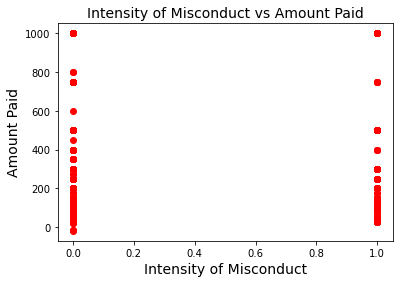

In [14]:
plt.scatter(Xvals['Intensity of Misconduct'], Yvals, color='red')
plt.title('Intensity of Misconduct vs Amount Paid', fontsize=14)
plt.xlabel('Intensity of Misconduct', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.show()

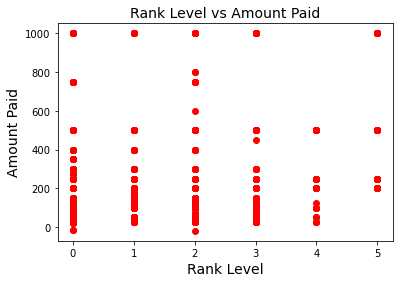

In [15]:
plt.scatter(Xvals['Rank Level'], Yvals, color='red')
plt.title('Rank Level vs Amount Paid', fontsize=14)
plt.xlabel('Rank Level', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.show()

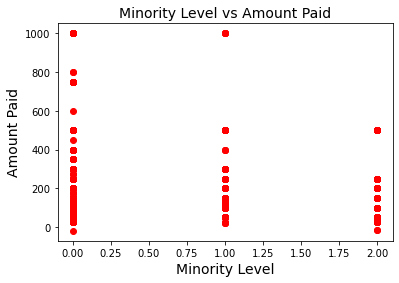

In [16]:
plt.scatter(Xvals['Minority Level'], Yvals, color='red')
plt.title('Minority Level vs Amount Paid', fontsize=14)
plt.xlabel('Minority Level', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.show()

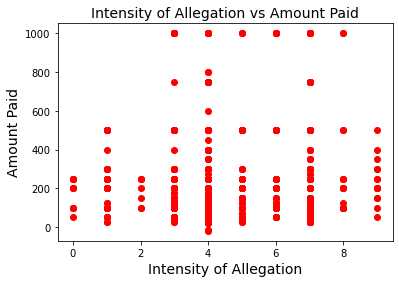

In [17]:
plt.scatter(Xvals['Intensity of Allegation'], Yvals, color='red')
plt.title('Intensity of Allegation vs Amount Paid', fontsize=14)
plt.xlabel('Intensity of Allegation', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.show()

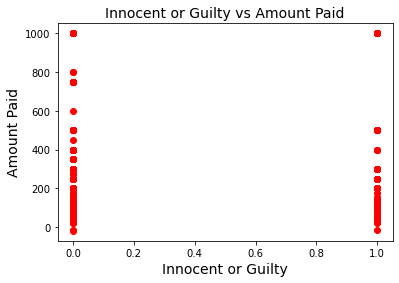

In [18]:
plt.scatter(Xvals['Innocent or Guilty'], Yvals, color='red')
plt.title('Innocent or Guilty vs Amount Paid', fontsize=14)
plt.xlabel('Innocent or Guilty', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.show()

## Now, regression!

In [19]:
model = linear_model.LinearRegression()
model.fit(Xvals, Yvals)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

X = sm.add_constant(Xvals)
 
smModel = sm.OLS(Yvals, X).fit()
predictions = smModel.predict(X)
 
print_model = smModel.summary()
print(print_model)

Intercept: 
 234.61042702549477
Coefficients: 
 [ 34.61953541  17.90582721 -10.54173615   2.62187996  -1.64627639]
                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     19.03
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           9.41e-19
Time:                        16:49:54   Log-Likelihood:                -26719.
No. Observations:                3971   AIC:                         5.345e+04
Df Residuals:                    3965   BIC:                         5.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---

From the results, we can see that the Rsq is very low -- 0.023, indicating that the model might not be the best predictor for the response variable. As we look into each variable's coefficient, we see that intensity of misconduct, rank level, and minority (if using 0.10 for alpha) have low p values showing that the predictors are signficant. As a result, I'll test out another model with only these variables.

In [20]:
model2 = linear_model.LinearRegression()
Xvals2 = Xvals[['Intensity of Misconduct', 'Rank Level', "Minority Level"]]
model2.fit(Xvals2, Yvals)

print('Intercept: \n', model2.intercept_)
print('Coefficients: \n', model2.coef_)

X2 = sm.add_constant(Xvals2)
 
smModel2 = sm.OLS(Yvals, X2).fit()
predictions2 = smModel2.predict(X2)
 
print_model2 = smModel2.summary()
print(print_model2)

Intercept: 
 247.1364315710428
Coefficients: 
 [ 32.53681283  17.7163074  -10.83868881]
                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     31.20
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.27e-20
Time:                        16:49:54   Log-Likelihood:                -26719.
No. Observations:                3971   AIC:                         5.345e+04
Df Residuals:                    3967   BIC:                         5.347e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Results

With this model, we don't see change in the Rsquared values and see slight change in the coefficients for predictors. However, we can see that intensity of misconduct and rank level both have positive coefficients, indicating that they are positively correlated with the response variable -- amount of contribution. On the other hand,minority level, with 0 indicating white, shows a negative correlation with amount of contribution. 

From these results, we can see that higher the rank and intesnsity of misconduct and lower the minority level (aka white), the higher the contribution. 

# One-Hot Vector Regression

### First, by Allegation

In [29]:
Xvals_onehot_Allegation = pd.get_dummies(df.Allegation)

X_onehot_Allegation = sm.add_constant(Xvals_onehot_Allegation)

smModel_onehot_Allegation = sm.OLS(Yvals, X_onehot_Allegation).fit()
 
print_model = smModel_onehot_Allegation.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.012
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.16e-05
Time:                        16:59:36   Log-Likelihood:                -26708.
No. Observations:                3971   AIC:                         5.353e+04
Df Residuals:                    3913   BIC:                         5.390e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Next, by Race

In [ ]:
Xvals_onehot_Race = pd.get_dummies(df.Race)

X_onehot_Race = sm.add_constant(Xvals_onehot_Race)

smModel_onehot_Race = sm.OLS(Yvals, X_onehot_Race).fit()

print_model = smModel_onehot_Race.summary()
print(print_model)

### Now, by finding

In [ ]:
Xvals_onehot_Finding = pd.get_dummies(df.Finding)

X_onehot_Finding = sm.add_constant(Xvals_onehot_Finding)

smModel_onehot_Finding = sm.OLS(Yvals, X_onehot_Finding).fit()

print_model = smModel_onehot_Finding.summary()
print(print_model)

In [ ]:
['Name', 'TypeOfMisconduct', 'Race', 'Rank', 'Allegation', 'Finding', 'Amount', 'Recipient']

### Now, TypeOfMisconduct

In [ ]:
Xvals_onehot_TypeOfMisconduct = pd.get_dummies(df.TypeOfMisconduct)

X_onehot_TypeOfMisconduct = sm.add_constant(Xvals_onehot_TypeOfMisconduct)

smModel_onehot_TypeOfMisconduct = sm.OLS(Yvals, X_onehot_TypeOfMisconduct).fit()

print_model = smModel_onehot_TypeOfMisconduct.summary()
print(print_model)

### Now, by Rank

In [ ]:
Xvals_onehot_Rank = pd.get_dummies(df.Rank)

X_onehot_Rank = sm.add_constant(Xvals_onehot_Rank)

smModel_onehot_Rank = sm.OLS(Yvals, X_onehot_Rank).fit()

print_model = smModel_onehot_Rank.summary()
print(print_model)